# Logistic Regression project

In [3]:
#titanic dataset -survival or not predictions (kaggle.com - data science hosting website, provide free datasets, competitions page)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
train=pd.read_csv('/Users/Taninka/Downloads/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_train.csv')
test=pd.read_csv('/Users/Taninka/Downloads/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/titanic_test.csv')



In [21]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
#use seaborn to check missing data
train.isnull() #false if it is not null or true if it is null

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

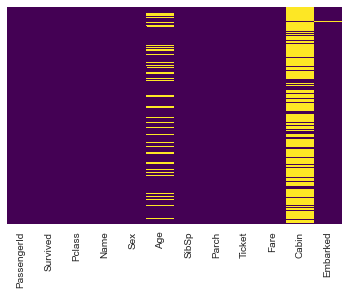

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#mising age valuesfor age column is not that bad, can be computed from other columns
#missing vlues for cabin column is too large to be computed, exclude this field from analysis

In [24]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

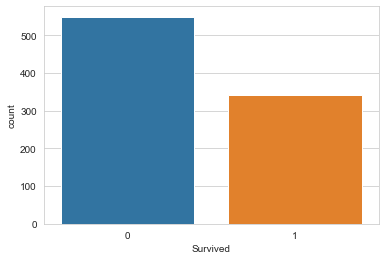

In [25]:
#for classification problems is always good to see count of who survived who not
sns.countplot(x='Survived',data=train) #more people did not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

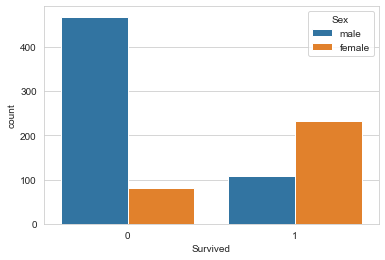

In [26]:
sns.countplot(x='Survived',data=train,hue='Sex') #there were more female who survived than men, also more man died

<AxesSubplot:xlabel='Survived', ylabel='count'>

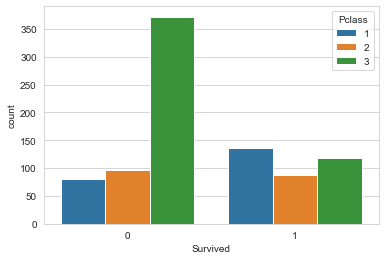

In [28]:
sns.countplot(x='Survived',data=train,hue='Pclass') #check survival based on pasanger classed
#most people from 3rd class died, it shoul dbe good to see hwo many people where in each class

<AxesSubplot:xlabel='Age'>

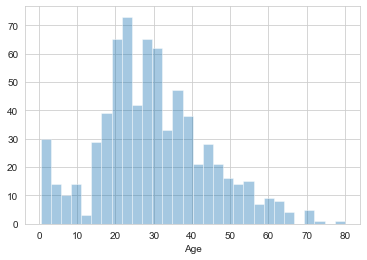

In [31]:
#distribution type plot of ages without Null values
sns.distplot(train['Age'].dropna(),kde=False,bins=30)
#quite few children but after that most peoaple are around 30-40 years old

<AxesSubplot:ylabel='Frequency'>

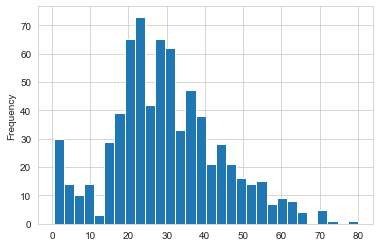

In [34]:
train['Age'].plot.hist(bins=30) #another way to plot distribituion dircetly from pandas

In [35]:
train.info() #SibSp number of siblings or sprouses on board

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='SibSp', ylabel='count'>

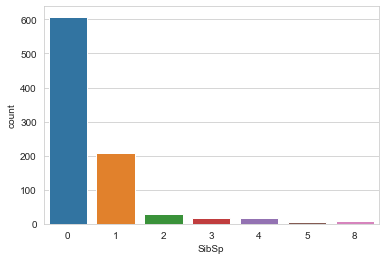

In [37]:
sns.countplot(x='SibSp',data=train) #0 or 1 children or spouse, probably men in 3rd class

<AxesSubplot:>

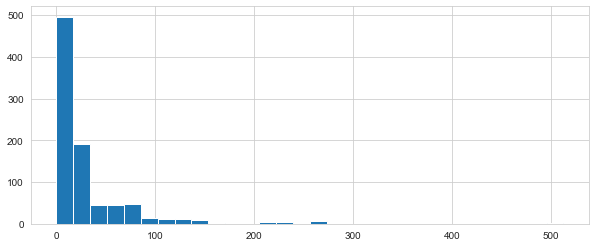

In [41]:
#how much people payed
train['Fare'].hist(bins=30,figsize=(10,4)) #most pruchases btw 0 and 50

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

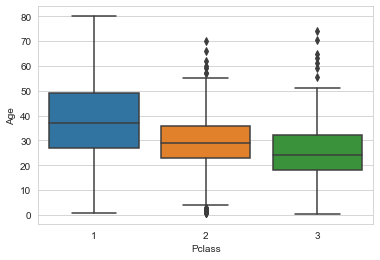

In [44]:
#fill Null values - for exmaple with average age, or we can be clever and fill average age by passanger class
sns.boxplot(x='Pclass',y='Age',data=train) #passangers in 1 and 2 class are tend to be older in average

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [51]:
train['Age']= train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

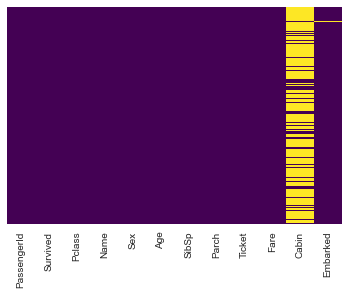

In [56]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [57]:
train.drop('Cabin', axis=1,inplace=True)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [59]:
#we still have one value missing in Embarked, since its just oen row we will delete it
train.dropna(inplace=True)

<AxesSubplot:>

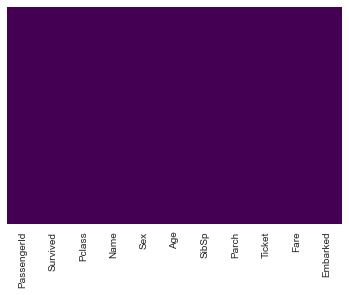

In [63]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # no null vallues

In [65]:
# we need to deal with categorical features, change them to somethign with 0 or 1 value - creating dummy variable
#click shift+tab to see the method
pd.get_dummies(train['Sex']) #to left jsut with one columns (casue the other one predict the fist one we need to sat drop_first=True)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [72]:
#to left jsut with one columns (casue the other one predict the fist one we need to sat drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True) #we can feed this into ML algorithm

In [73]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [74]:
embark.head() #only C columsn were dropped, columsn are not perfect predictiors of each other

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [76]:
#concatination of new dataframe sex and embark
train=pd.concat([train,sex,embark],axis=1)

In [80]:
train.head() #we do not need embarked and sex column, we wont be ables to use ticked or name column (no much info there)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [82]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [85]:
train.head() #all columsn are numerical, passenger id may be deleted as well

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [86]:
train.drop(['PassengerId'],axis=1,inplace=True)

In [87]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [98]:
#LR machine learning algorithm
y=train['Survived']
X=train[['Pclass','Age','SibSp','Parch','Fare','male','Q','S']] # or train.drop('Survived',axis=1)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [106]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression() #create model

In [107]:
lr.fit(X_train,y_train) #fit model

/Users/Taninka/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
predictions=lr.predict(X_test) #predict model

In [109]:
#evaluation
from sklearn.metrics import classification_report #precision, accuracy, f1 socre and so on

print(classification_report(y_test,predictions))



              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]])

# Project number 2

In [131]:
ad_data=pd.read_csv('/Users/Taninka/Downloads/Refactored_Py_DS_ML_Bootcamp-master/13-Logistic-Regression/advertising.csv')

In [132]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [133]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [134]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:>

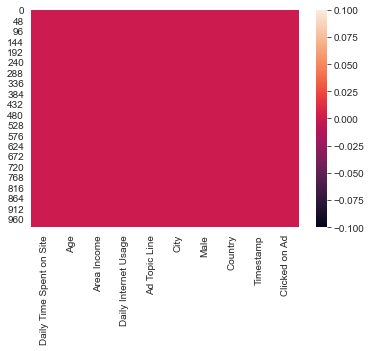

In [135]:
sns.heatmap(ad_data.isnull())

Text(0.5, 0, 'Age')

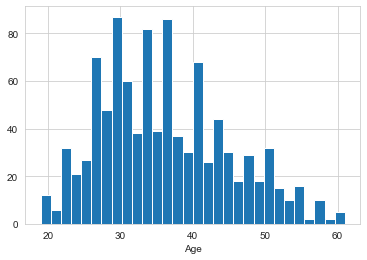

In [136]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

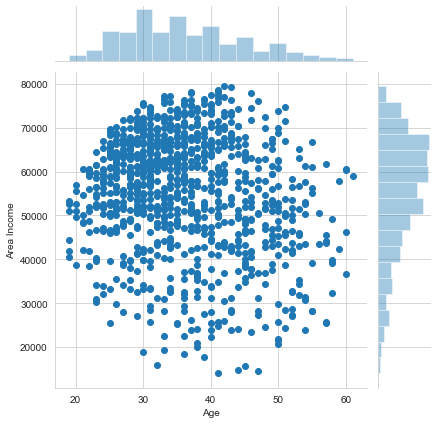

In [137]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

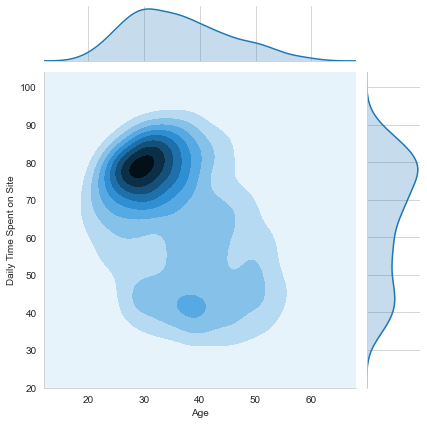

In [138]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde')

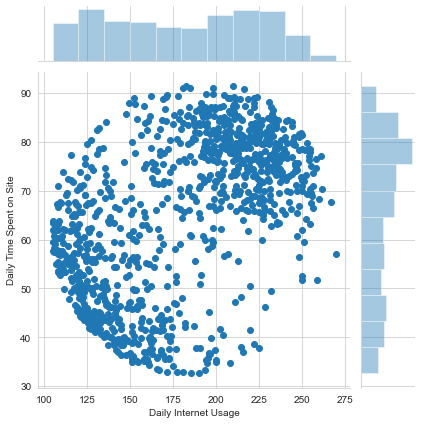

In [139]:
sns.jointplot(x='Daily Internet Usage',y='Daily Time Spent on Site',data=ad_data)

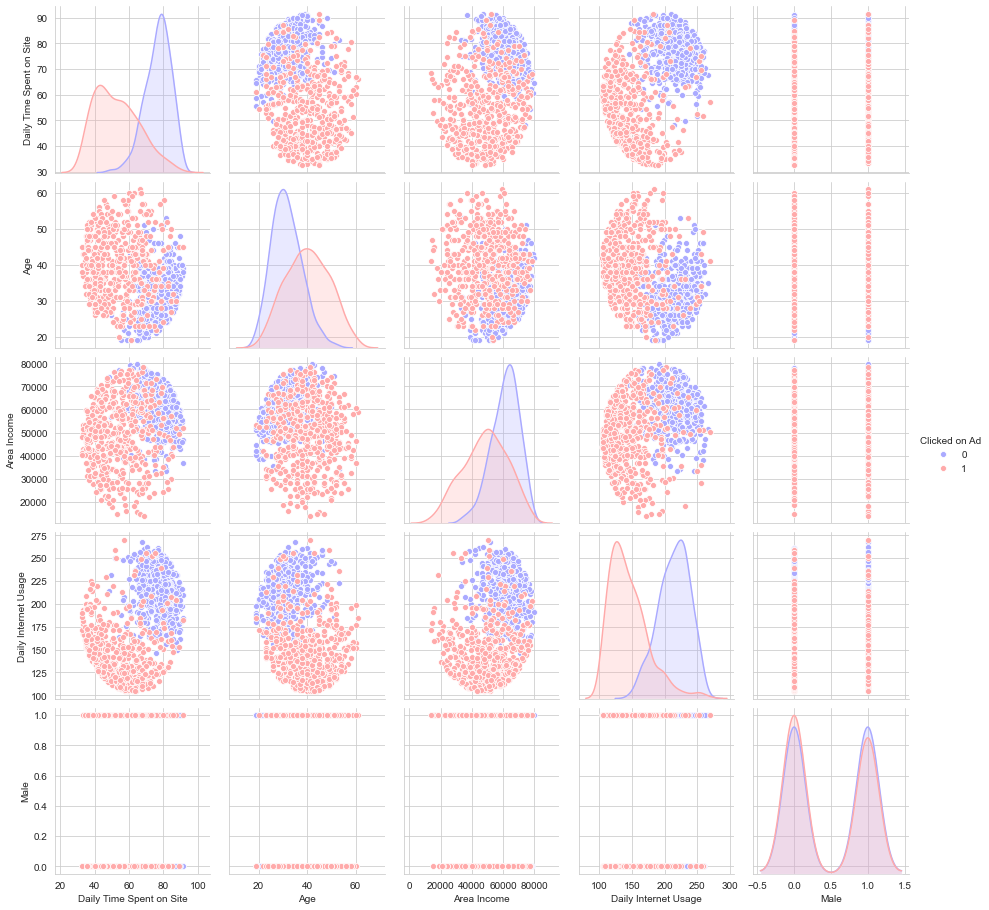

In [140]:
sns.pairplot(ad_data, hue = 'Clicked on Ad', palette='bwr')

In [141]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [142]:
X=ad_data[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']]
y=ad_data['Clicked on Ad']

In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.33,random_state=42)

In [144]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
predictions=lr.predict(X_test)

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       324
           1       0.92      0.86      0.89       346

    accuracy                           0.89       670
   macro avg       0.89      0.89      0.89       670
weighted avg       0.89      0.89      0.89       670

